# BCI-Motor imagery Data Preprocessing

- Import data and check stimulus events

In [357]:
import mne
import numpy as np
raw_edf = mne.io.read_raw_edf("C:\git\Senior_Thesis\DataSet\Convert_data\class3_try_edf.edf",preload = True)

Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Convert_data\class3_try_edf.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 107749  =      0.000 ...   430.996 secs...


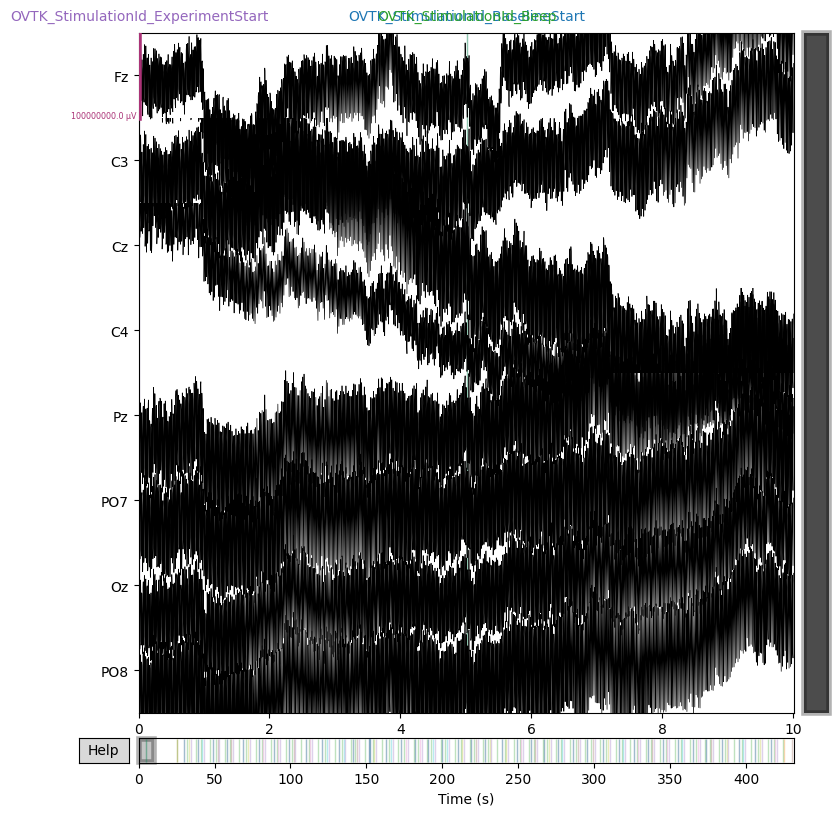

...


In [358]:
raw_edf.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )
print("...")

In [359]:
max(raw_edf[6][0][0])

95823.09

- Digital Filter and Average Reference

In [360]:
filtered_eeg = raw_edf.copy().filter(l_freq=0.1, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 0.10, 3.00 Hz: -6.02, -6.02 dB



c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


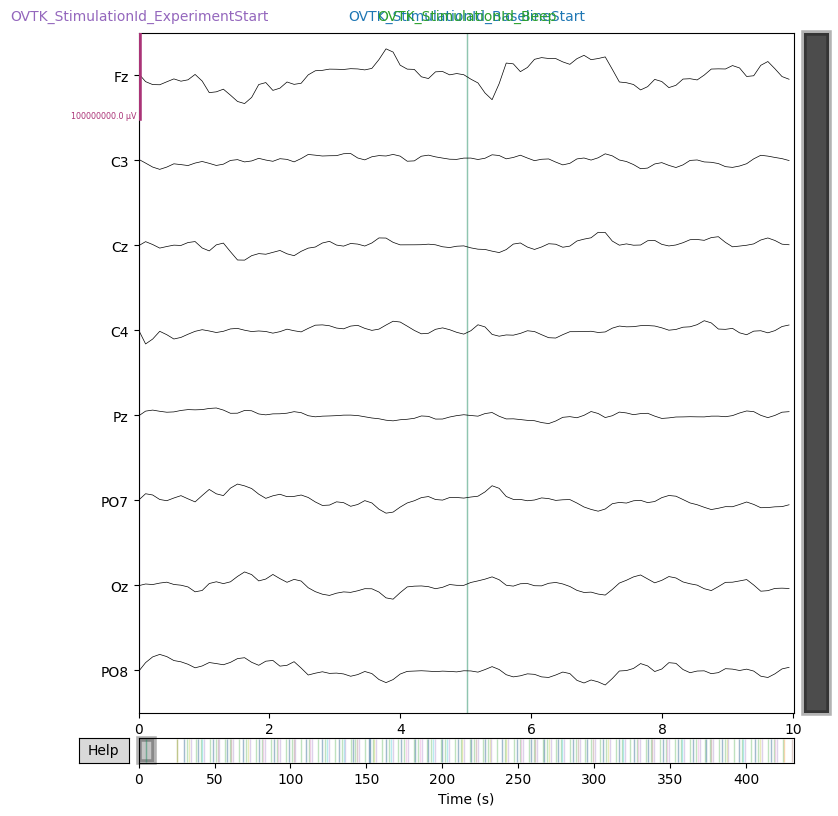

...


In [361]:
eeg_ref = filtered_eeg.copy().set_eeg_reference(ref_channels="average")
eeg_ref.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )
print("...")

In [362]:
max(eeg_ref[0][0][0])

801.0668690207754

In [363]:
eeg_ref = eeg_ref.pick_channels(['C3','Cz','C4'])
events, event_dict = mne.events_from_annotations(eeg_ref)
epochs = mne.Epochs(eeg_ref, events, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
        baseline=(0, 0),
        event_id=event_dict,
        preload = True,
        event_repeated='drop'
    )

Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_End_Of_Session', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Feedback_Continuous', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up', 'OVTK_StimulationId_BaselineStart', 'OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Beep', 'OVTK_StimulationId_ExperimentStart', 'OVTK_StimulationId_Train']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
205 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 205 events and 1126 original time points ...
2 bad epochs dropped


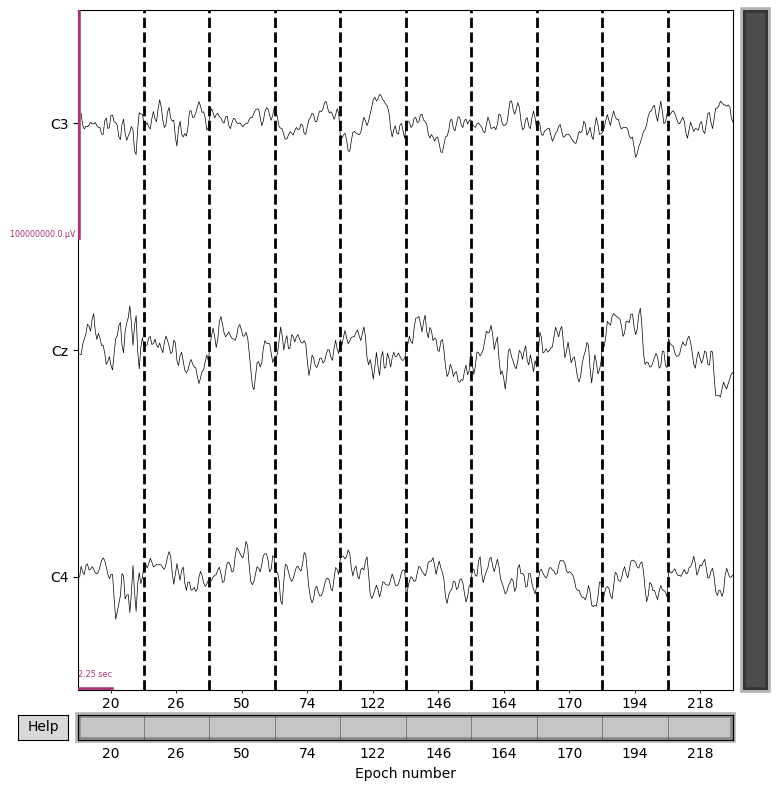

In [364]:
epochs['OVTK_GDF_Left'].plot(
    scalings=50, # You may edit scalings value later
    title='Left stimuli start',
)
left = epochs['OVTK_GDF_Left'].get_data()

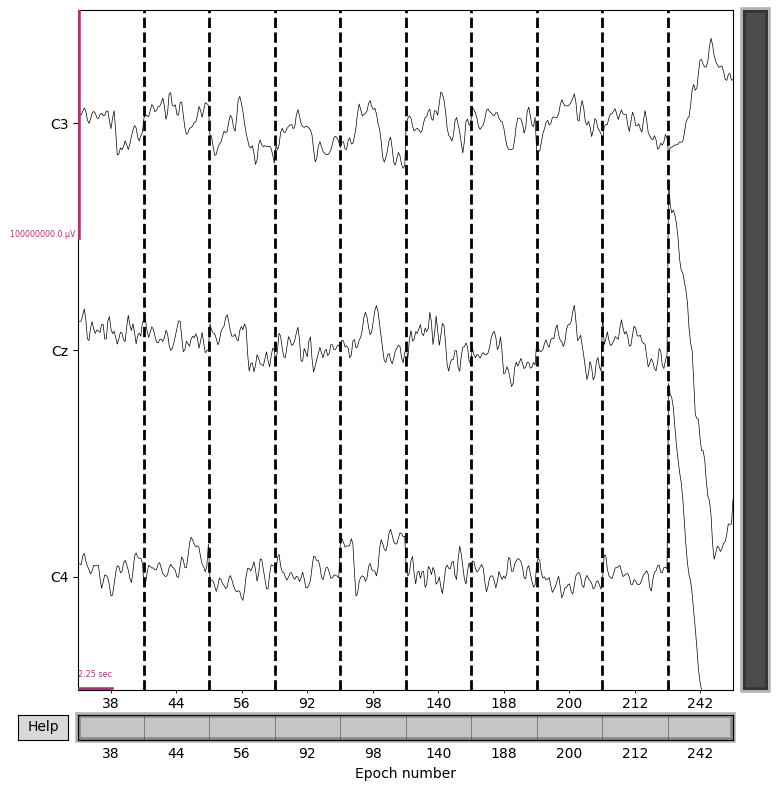

In [365]:
epochs['OVTK_GDF_Right'].plot(
    scalings=50, # You may edit scalings value later
    title='Left stimuli start',
)
right = epochs['OVTK_GDF_Right'].get_data()

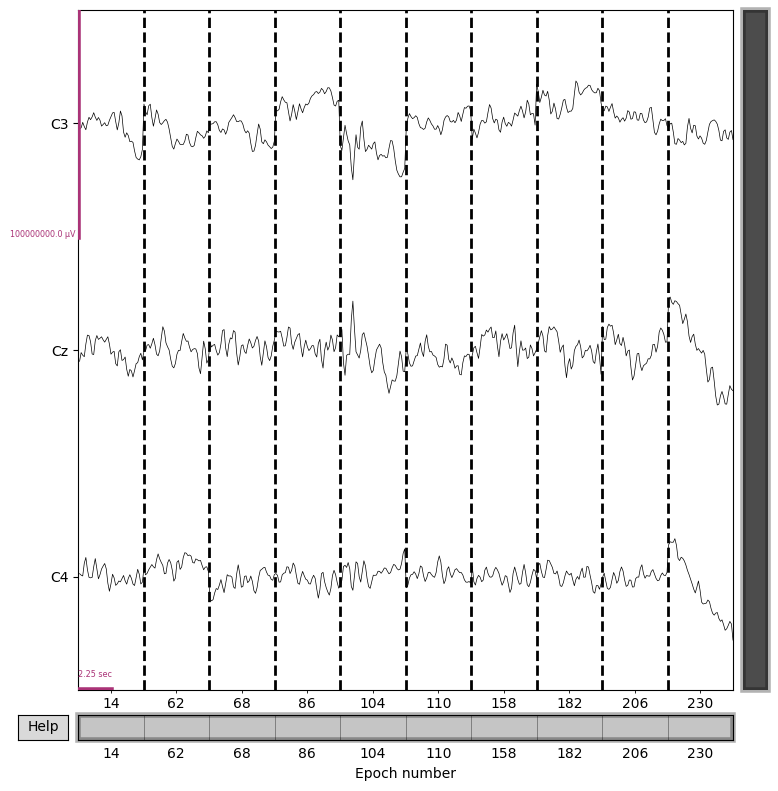

In [366]:
epochs['OVTK_GDF_Up'].plot(
    scalings=50, # You may edit scalings value later
    title='Left stimuli start',
)
up = epochs['OVTK_GDF_Up'].get_data()

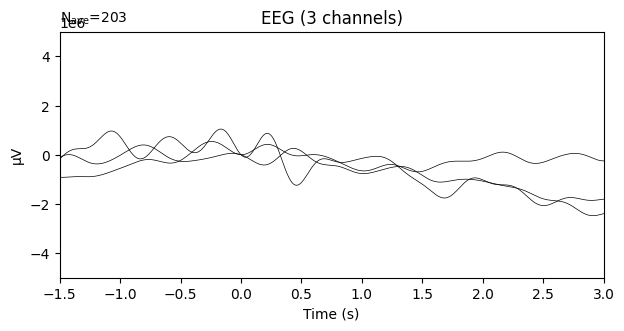

In [367]:
plot_kwargs = dict(picks="all", ylim=dict(eeg=(-5000000, 5000000)))

# plot the evoked for the EEG and the EOG sensors
fig = epochs.average("all").plot(**plot_kwargs)
fig.set_size_inches(600, 600)


# Feature Extraction

- MRCP , LF-ASD

- ERD/ERS

- PSD

- CSP

- CWT

- STFT